# Diffusion Equation in 1D

Here we explore numerical solutions to the diffusion (or heat) equation in 1D

\begin{align}
  \frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2}
\end{align}

where $u = u(x,t)$, and $\nu$ is taken here to be a constant. The main difference between this equation and the linear advection equation is that the spatial derivative is now second-order. This drastically changes the nature of the solutions. Rather than propagating, the analytical solutions now diffuse, or smooth out, as they approach a steady-state configuration. The parameter $\nu$ is called the diffusion coefficient, or diffusivity, and it is related to how rapidly some concentration in the variable $u$ diffuses. 

Because the expected behavior of the solutions are different compared to the advection equation, it should come as no suprise that a different scheme should be used. In particular, diffusion is an isotropic process, occuring in all directions (in our 1D case, this means both to the right and to the left). This strongly suggests that we will have more success if we use a symmetric scheme rather than a one-sided scheme that we used for the 1D advection equation. So here we will approximate spatial derivatives using a centered differencing scheme (rather than backward differencing as inthe advection equation)

\begin{align}
  \frac{\partial^2 u}{\partial x^2} \rightarrow \frac{u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1}}{(\Delta{x})^2}
\end{align}

We will keep the forward differencing for time derivaties. The resulting FTCS (forward-time, centered-space) scheme leads to the difference equation

\begin{align}
  u^{n+1}_{i} = u^{n}_{i} 
  + \frac{\nu\Delta{t}}{(\Delta{x})^2}\left(u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1}\right)
\end{align}

As with the FTBS approach to the advection equation, this FTCS approach to the diffusion equation is only **conditionally stable**. The CFL condition for this method is 

\begin{align}
  \frac{\nu\Delta{t}}{(\Delta{x})^2} \leq 0.5
\end{align}

which you can experimentally verify for yourself.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
# function to evolve diffusion equation    
def diffusion(nx):
    """
    this evolves solutions to the diffusion equation using an FTCS scheme
    for a given number of spatial grid points only. Courant number, and 
    therefore stability, is only determined after the fact.
    
    nx = total number of spatial grid points 
    """
    # diffusivity
    nu = 1.0
    print('diffusion coefficient is',nu)

    # setup spatial grid (vertex-centered)
    L = 2.0         # size of physical grid
    dx = L/(nx-1)   # grid spacing
    x = np.linspace(0, L, nx)
    print('grid spacing is',dx)

    # setup time grid
    dt = 0.00025  # size of timesteps
    nt = 50     # total number of timesteps
    print('time stepsize is',dt)

    # stability diagnostics
    s = nu*dt/dx**2   # Courant number
    print('Courant number is',s)

    # initialize grid function
    u = np.ones((nt,nx)) # grid function at the current step
    
    # initial data
    a = int(0.25*L/dx) #location of the first jump
    b = int(0.5*L/dx)  #location of the second jump
    u[0,:a] = 1.         #value before the first jump
    u[0,a:b] = 2.        #value between first and second jumps
    u[0,b:] = 1.         #value after the second jump
    
    # solve
    for n in range(nt-1):
        # update interior points using FTCS scheme
        for i in range (1,nx-1):
            u[n+1,i] = u[n,i] + s*(u[n,i+1] - 2*u[n,i] + u[n,i-1])
        # update left boundary point
        #u[n+1,0] = u[n,1]
        # update right boundary point
        #u[n+1,-1] = u[n,-2]

    # create figure
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # plot
    for n in range(nt):
        ax.cla()
        ax.set_ylim(0, 1.15*np.amax(u[0]))
        ax.set_xlim(0, L)
        ax.set_xlabel('x')
        ax.set_ylabel('u(x,t)')
        ax.set_title('time step = %.2f' % n)
        ax.plot(x,u[n])
        fig.canvas.draw()

diffusion coefficient is 1.0
grid spacing is 0.025
time stepsize is 0.00025
Courant number is 0.3999999999999999


<IPython.core.display.Javascript object>


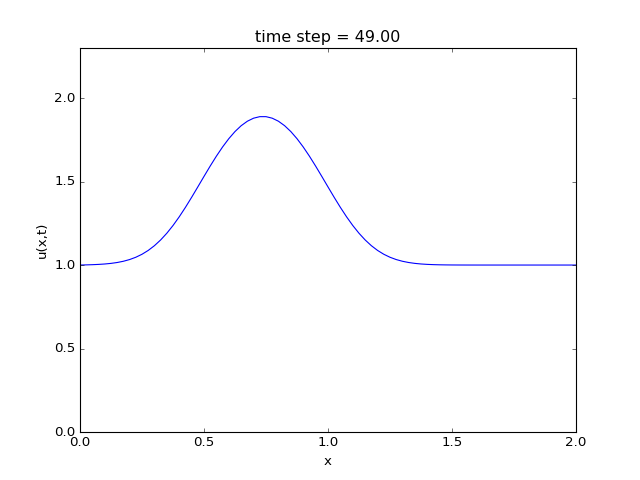

In [3]:
diffusion(81)

In [4]:
# function to evolve diffusion equation    
def diffusionCourant(nx, s):
    """
    this evolves solutions to the diffusion equation using an FTCS scheme
    for a given number of spatial grid points, and given Courant number.
    Timestep size is calculated from grid spacing and Courant number.
    
    nx = total number of spatial grid points 
    s = Courant number = nu * dt / dx**2
    """
    # diffusivity
    nu = 1.0
    print('diffusion coefficient is',nu)

    # setup spatial grid (vertex-centered)
    L = 2.0         # size of physical grid
    dx = L/(nx-1)   # grid spacing
    x = np.linspace(0, L, nx)
    print('grid spacing is',dx)

    # setup time grid
    dt = dx**2/nu  # size of timesteps
    nt = 50     # total number of timesteps
    print('time stepsize is',dt)

    # initialize grid function
    u = np.ones((nt,nx)) # grid function at the current step
    
    # initial data
    a = int(0.25*L/dx) #location of the first jump
    b = int(0.5*L/dx)  #location of the second jump
    u[0,:a] = 1.         #value before the first jump
    u[0,a:b] = 2.        #value between first and second jumps
    u[0,b:] = 1.         #value after the second jump
    
    # solve
    for n in range(nt-1):
        # update interior points using FTCS scheme
        for i in range (1,nx-1):
            u[n+1,i] = u[n,i] + s*(u[n,i+1] - 2*u[n,i] + u[n,i-1])
        # update left boundary point
        #u[n+1,0] = u[n,1]
        # update right boundary point
        #u[n+1,-1] = u[n,-2]

    # create figure
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # plot
    for n in range(nt):
        ax.cla()
        ax.set_ylim(0, 1.15*np.amax(u[0]))
        ax.set_xlim(0, L)
        ax.set_xlabel('x')
        ax.set_ylabel('u(x,t)')
        ax.set_title('time step = %.2f' % n)
        ax.plot(x,u[n])
        fig.canvas.draw()

diffusion coefficient is 1.0
grid spacing is 0.025
time stepsize is 0.0006250000000000001


<IPython.core.display.Javascript object>


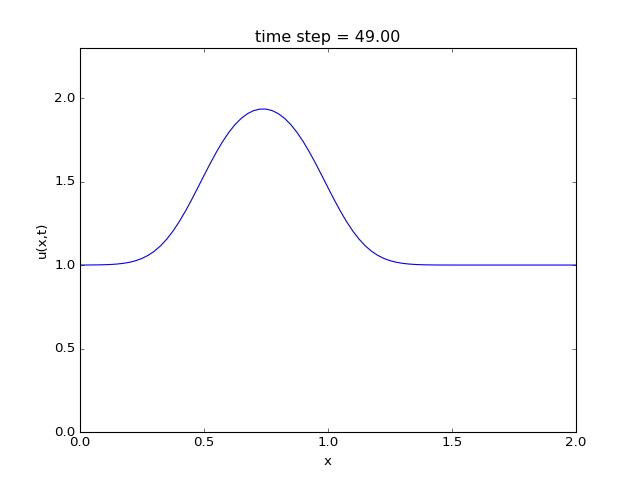

In [7]:
diffusionCourant(81, 0.3)